In [36]:
import cv2
import numpy as np
import sys
import matplotlib.pyplot as plt

In [37]:
def findCenter(approx):
    points = np.squeeze(approx)  # (4, 1, 2) ==> (4, 2)
    center_x = round(np.mean(points[:, 0])) #컨테이너 중심점 찾기 x좌표
    center_y = round(np.mean(points[:, 1])) #컨테이너 중심점 찾기 y좌표
    points_center = [center_x, center_y] #컨테이너 중심
    
    return points_center

[458, 240]
[313, 231]


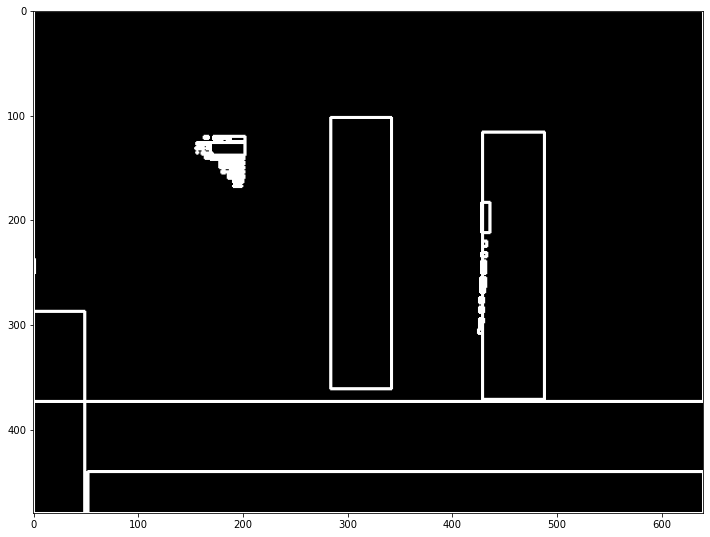

In [46]:
src = cv2.imread('container/KakaoTalk_20210630_235147660.png',cv2.IMREAD_COLOR)
if src is None:
    print('Image load failed!')
    sys.exit()

height, width, channel = src.shape

gray = cv2.cvtColor(src, cv2.COLOR_RGB2GRAY)
#laplacian = cv2.Laplacian(gray, cv2.CV_8U, ksize=5)
#med=cv2.medianBlur(laplacian, 5, dst=None)

ret, binary = cv2.threshold(gray,127, 255,cv2.THRESH_BINARY|cv2.THRESH_OTSU)

#cv2.imshow('sc',binary )
#cv2.waitKey()
#cv2.destroyAllWindows()
#print(ret)#T값 출력
contours, _ = cv2.findContours(binary ,cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_NONE)

#contours그려보기
temp_result = np.zeros((height, width, channel), dtype=np.uint8)

contours_dict = []
#윤곽선 감싸기
for contour in contours:
    x, y, w, h = cv2.boundingRect(contour)
    cv2.rectangle(temp_result, pt1=(x, y), pt2=(x+w, y+h), color=(255, 255, 255), thickness=2)
    
    # insert to dict
    contours_dict.append({
        'contour': contour,
        'x': x,
        'y': y,
        'w': w,
        'h': h,
        'cx': x + (w / 2),
        'cy': y + (h / 2)
    })

plt.figure(figsize=(12, 10))
plt.imshow(temp_result, cmap='gray')
i=0

for points in contours:
    if  (cv2.contourArea(points)<6000 or cv2.contourArea(points)>15000):
        continue
    approx = cv2.approxPolyDP(points, cv2.arcLength(points, True) * 0.02, True)
    if not cv2.isContourConvex(approx) or len(approx) != 4:
        continue
    cv2.polylines(src, [approx], True, (0, 0, 255), thickness = 3)
    #cv2.drawContours(src, contours, -1, (0,255,0), 3)

    container_center = findCenter(approx) #컨테이너 중심점 체크
    print(container_center) #컨테이너 위치 확인 list형으로 저장됨
    if container_center is not None:
        cv2.putText(src, str(i+1),findCenter(approx), cv2.FONT_HERSHEY_COMPLEX, 0.8, (0, 255, 0), 1)
        i+=1
    

    
cv2.imshow('src', src)
cv2.waitKey()
cv2.destroyAllWindows()